# Saikat Sarkar

# Student Marks Prediction with Linear Regression
### Task 2 - To Explore Supervised Machine Learning

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We use the data available at http://bit.ly/w-data.

At the end, we will answer the question: What will be predicted score if a student studied for 9.25 hours?

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', data.shape)
data.head()

Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Preparation

__*Step 1:*__ Let's check for missing values.

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the dataset. Therefore, we needn't worry about imputation.

__*Step 2:*__ Let's create a NumPy array *X* that contains our explanatory variable, i.e. *Hours*. And another NumPy array *y* that contains our response variable, i.e. *Scores*.

In [4]:
X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

__*Step 3:*__ We are now going to split the data into training and test sets. We are going to use 80% of the data for training and the remaining 25% for testing.

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 60)

### Visualising the Data

Now, let's take a look at the data graphically.

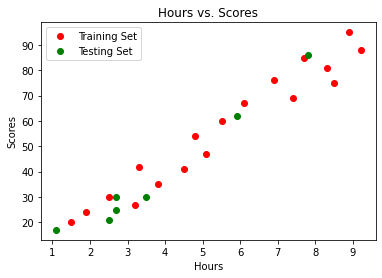

In [6]:
plt.plot(X_train, y_train, 'ro', label = 'Training Set')
plt.plot(X_test, y_test, 'go', label = 'Testing Set')
plt.legend()
plt.title('Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Linear Regression

We are going to create two linear regression models. We will create one from scratch, and another using scikit-learn.

### Training the Algorithm

Now, let's take a look at the regression graph.

### *__Part 2: Linear Regression using scikit-learn__*

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print ("Slope: ", regressor.coef_[0])
print ("Intercept: ", regressor.intercept_)

Slope:  9.398623348307622
Intercept:  4.69980145459526


Now, let's take a look at the regression graph.

c:\users\saika\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


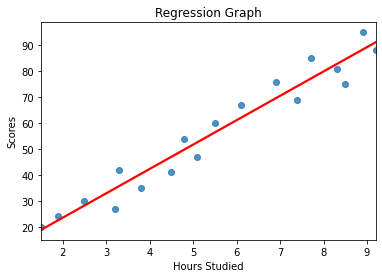

In [8]:
sns.regplot(X_train, y_train,ci = None, line_kws={'color':'r'})
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

**We can see that the slope and intercept for both our linear regression models is the same. Therefore, we have been successful in creating a linear regression model from scratch!**

### Making Predictions

Let's now test our trained algorithm with the testing set.

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
df = pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Hours,Actual Score,Predicted Score
0,1.1,17,15.038287
1,2.7,30,30.076084
2,5.9,62,60.151679
3,2.5,21,28.196360
4,2.7,25,30.076084
5,7.8,86,78.009064
6,3.5,30,37.594983


Now, it's time to answer the question we asked before we started: *What will be predicted score if a student studied for 9.25 hours?*

In [11]:
print('Hours of study: 9.25')
print('Predicted score: ', regressor.predict([[9.25]])[0])

Hours of study: 9.25
Predicted score:  91.63706742644077


### *__Evaluating the Model__*

In [12]:
from sklearn import metrics  
print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root_Mean_Squared_Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Value:', metrics.r2_score(y_test, y_pred))

Mean_Absolute_Error: 4.534926010049907
Root_Mean_Squared_Error: 5.429594287654095
R2_Value: 0.9471327692761757


Therefore, we can say that our model's accuracy is **94.71%**.